In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d liusha249/tinyimagenet

tinyimagenet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip tinyimagenet.zip -d train

In [ ]:
import numpy as np 
import pandas as pd 
import glob
import os 
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras import utils as np_utils
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, ELU, core

In [ ]:
train_path = os.listdir("/content/train/tiny-imagenet-200/train")

In [ ]:
Y_train = np.zeros((10000, 1))
X_train = np.zeros((10000, 64, 64, 3))
k=0
for i in train_path:
  
  #print(i)
  path = glob.glob('/content/train/tiny-imagenet-200/train/' + (i) + '/images/')
  #tr_path.append(glob.glob('/content/train/tiny-imagenet-200/train/' + (i) + '/images/'))
  j = 0
  while j<50:
    Y_train[(k*50)+j] = k
    X_train[(k*50)+j, :, :, :] = cv2.imread(path[0] + i + '_'+str(j)+'.JPEG')
    j+=1
  k+=1
  print(k)




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


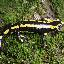

[11.]


In [ ]:
cv2_imshow(X_train[565, :, :, :])
print(Y_train[565, :])

In [ ]:
### Normalization
for i in range(len(X_train)):
  x = X_train[i, :, :, :]
  x = x/x.max()
  X_train[i, :, :, :] = x



In [ ]:

shuffle = list(range(np.size(Y_train, 0)))
np.random.shuffle(shuffle)
x_train = X_train[shuffle, :, :]
y_train = Y_train[shuffle, :]

In [ ]:
y_train = np_utils.to_categorical(y_train, 200)

In [ ]:
xx_train , xx_test, yy_train, yy_test = train_test_split(x_train, y_train, test_size=0.02, random_state=32)

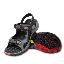

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
cv2_imshow(x_train[800, :, :, :]*255)
print(y_train[800, :])

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape = (64, 64, 3))
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
model= Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [ ]:
for layer in model.layers:
  layer.trainable = False
#x = model.output
#x = GlobalAveragePooling2D()(x)
#output = Dense (units= 2 , activation = "softmax")(x)
#model (input = model.input , output= output)
model.add (GlobalAveragePooling2D ())
model.add (Dense(units = 200, activation = "softmax"))
model.add(Dropout(0.5))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 16, 16, 256)       2

In [ ]:
del X_train, Y_train

In [ ]:
model.compile(optimizer = Adam(learning_rate =0.0002) , loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(xx_train, yy_train,
          batch_size=8,
          epochs=60,
          shuffle=True,
          verbose=1,
          validation_split=0.35,
          callbacks=[])

Epoch 1/60
797/797 [==============================] - 25s 32ms/step - loss: 8.9515 - accuracy: 0.3187 - val_loss: 3.5883 - val_accuracy: 0.2239
Epoch 2/60
797/797 [==============================] - 27s 34ms/step - loss: 8.9713 - accuracy: 0.3199 - val_loss: 3.5881 - val_accuracy: 0.2271
Epoch 3/60
797/797 [==============================] - 25s 31ms/step - loss: 8.9613 - accuracy: 0.3187 - val_loss: 3.5912 - val_accuracy: 0.2318
Epoch 4/60
797/797 [==============================] - 25s 31ms/step - loss: 8.8322 - accuracy: 0.3210 - val_loss: 3.5903 - val_accuracy: 0.2294
Epoch 5/60
797/797 [==============================] - 25s 31ms/step - loss: 8.9464 - accuracy: 0.3229 - val_loss: 3.5921 - val_accuracy: 0.2216
Epoch 6/60
797/797 [==============================] - 25s 31ms/step - loss: 8.8987 - accuracy: 0.3209 - val_loss: 3.5862 - val_accuracy: 0.2254
Epoch 7/60
797/797 [==============================] - 27s 34ms/step - loss: 8.7772 - accuracy: 0.3316 - val_loss: 3.5837 - val_accuracy:

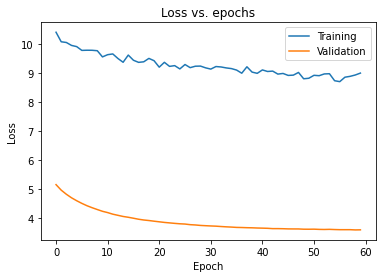

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.savefig("fig1.png" , dpi = 200)
plt.show()
#path = "/content/drive/MyDrive/fig/"

#path + 'Klassifikator1.svg', dpi=150

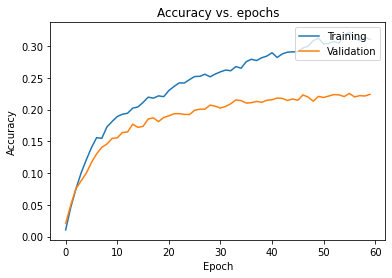

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.savefig("fig2.png" , dpi = 200)
plt.show()
#path = "/content/drive/MyDrive/fig/"

#path + 'Klassifikator1.svg', dpi=150